In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns 
sns.set_theme()


In [86]:
src = "/Users/iansnyder/Desktop/Projects/Spotify_Proj/Data/ExampleData/StreamingHistory0.json"
data =  pd.read_json(src)
data['endTime'] = pd.to_datetime(data['endTime'], format="%Y-%m-%d %H:%M")
data['day'] = data['endTime'].dt.strftime('%d')
data['hour'] = data['endTime'].dt.strftime('%H')
data['month'] = data['endTime'].dt.strftime('%m')
data['dm'] = data['endTime'].dt.strftime('%m/%d/%Y')

def get_season(date):
    d = date.split('/')
    month = int(d[0])
    day = int(d[1])
    if month>=3 and month<6:
        return 'spring'
    elif month>=6 and month<9:
        return 'summer'
    elif month>=9 and month<12:
        return 'fall'
    else:
        return 'winter'
        






data['season'] = data['dm'].apply(get_season)




In [113]:
def get_artists(data):
        df = data.copy()
        grouped_df = df.groupby('artistName')['msPlayed'].sum().reset_index()
        sorted_df = grouped_df.sort_values('msPlayed', ascending=False)
        sorted_df['minutesPlayed'] = round((sorted_df['msPlayed'] / 60000), 2)
        sorted_df['rank'] = sorted_df['minutesPlayed'].rank(method='average', ascending=False)
        sorted_df.drop(['msPlayed'], axis=1, inplace=True)
        print(sorted_df)
get_artists(data)

        artistName  minutesPlayed  rank
62    Taylor Swift          34.97   1.0
29         J. Cole          32.86   2.0
18      Ed Sheeran          26.07   3.0
66         The Jam          24.47   4.0
15       Dead Prez          20.48   5.0
..             ...            ...   ...
68  Vernon Sanders           2.04  66.0
54   Palm Paradise           1.84  67.0
16           Dixie           0.48  68.0
56  Retro Nicotine           0.15  69.0
33            KBFR           0.01  70.0

[70 rows x 3 columns]


In [88]:
def get_songs(data):
        df = data.copy()
        grouped_df = df.groupby('trackName')['msPlayed'].sum().reset_index()
        sorted_df = grouped_df.sort_values('msPlayed', ascending=False)
        sorted_df['minutesPlayed'] = sorted_df['msPlayed'] / 60000
        sorted_df.drop(['msPlayed'], axis=1, inplace=True)
        print(sorted_df)
get_songs(data)

                                             trackName  minutesPlayed
88                                         Street Life      11.303333
117                                          gold rush      10.653933
28                                  Giorgio by Moroder       9.077100
113                                          Your Song       6.516433
86                                            Stardust       6.415067
..                                                 ...            ...
50                                    Lion King On Ice       0.053550
40   If I Ruled the World (Imagine That) (feat. Lau...       0.052567
112                                  You'll Find a Way       0.046333
109                                     Wolves (Intro)       0.017167
34                                           Hood Baby       0.011667

[119 rows x 2 columns]


In [89]:
def get_month_art(data, filter_month):
    return get_artists(data[data['month']==filter_month])
def get_month_son(data,filter_month):
    return get_songs(data[data['month']==filter_month])
    
get_month_son(data, '01')

                                            trackName  minutesPlayed
37  Really Love (feat. Craig David & Digital Farm ...       5.916667
32                    Paradise (feat. Dermot Kennedy)       5.596767
36                                         Propaganda       5.212217
9                   Cornelia Street - Live From Paris       4.933550
26                                 N.Y. State of Mind       4.866667
24                                           Mind Sex       4.851100
18                         How Would You Feel (Paean)       4.675550
47                                    We Want Freedom       4.557333
10                                            Deja Vu       4.412433
7                                  Castle on the Hill       4.352550
39                                        Save Myself       4.118433
53                                    drivers license       4.033550
42                             Something's Gotta Give       3.939333
50                                

  day  minutesPlayed
4  10      32.857150
7  17      31.196533
1  04      27.813433
2  05      20.405083
0  01      18.697317
3  07      14.324167
5  11      13.136417
6  12       4.919233


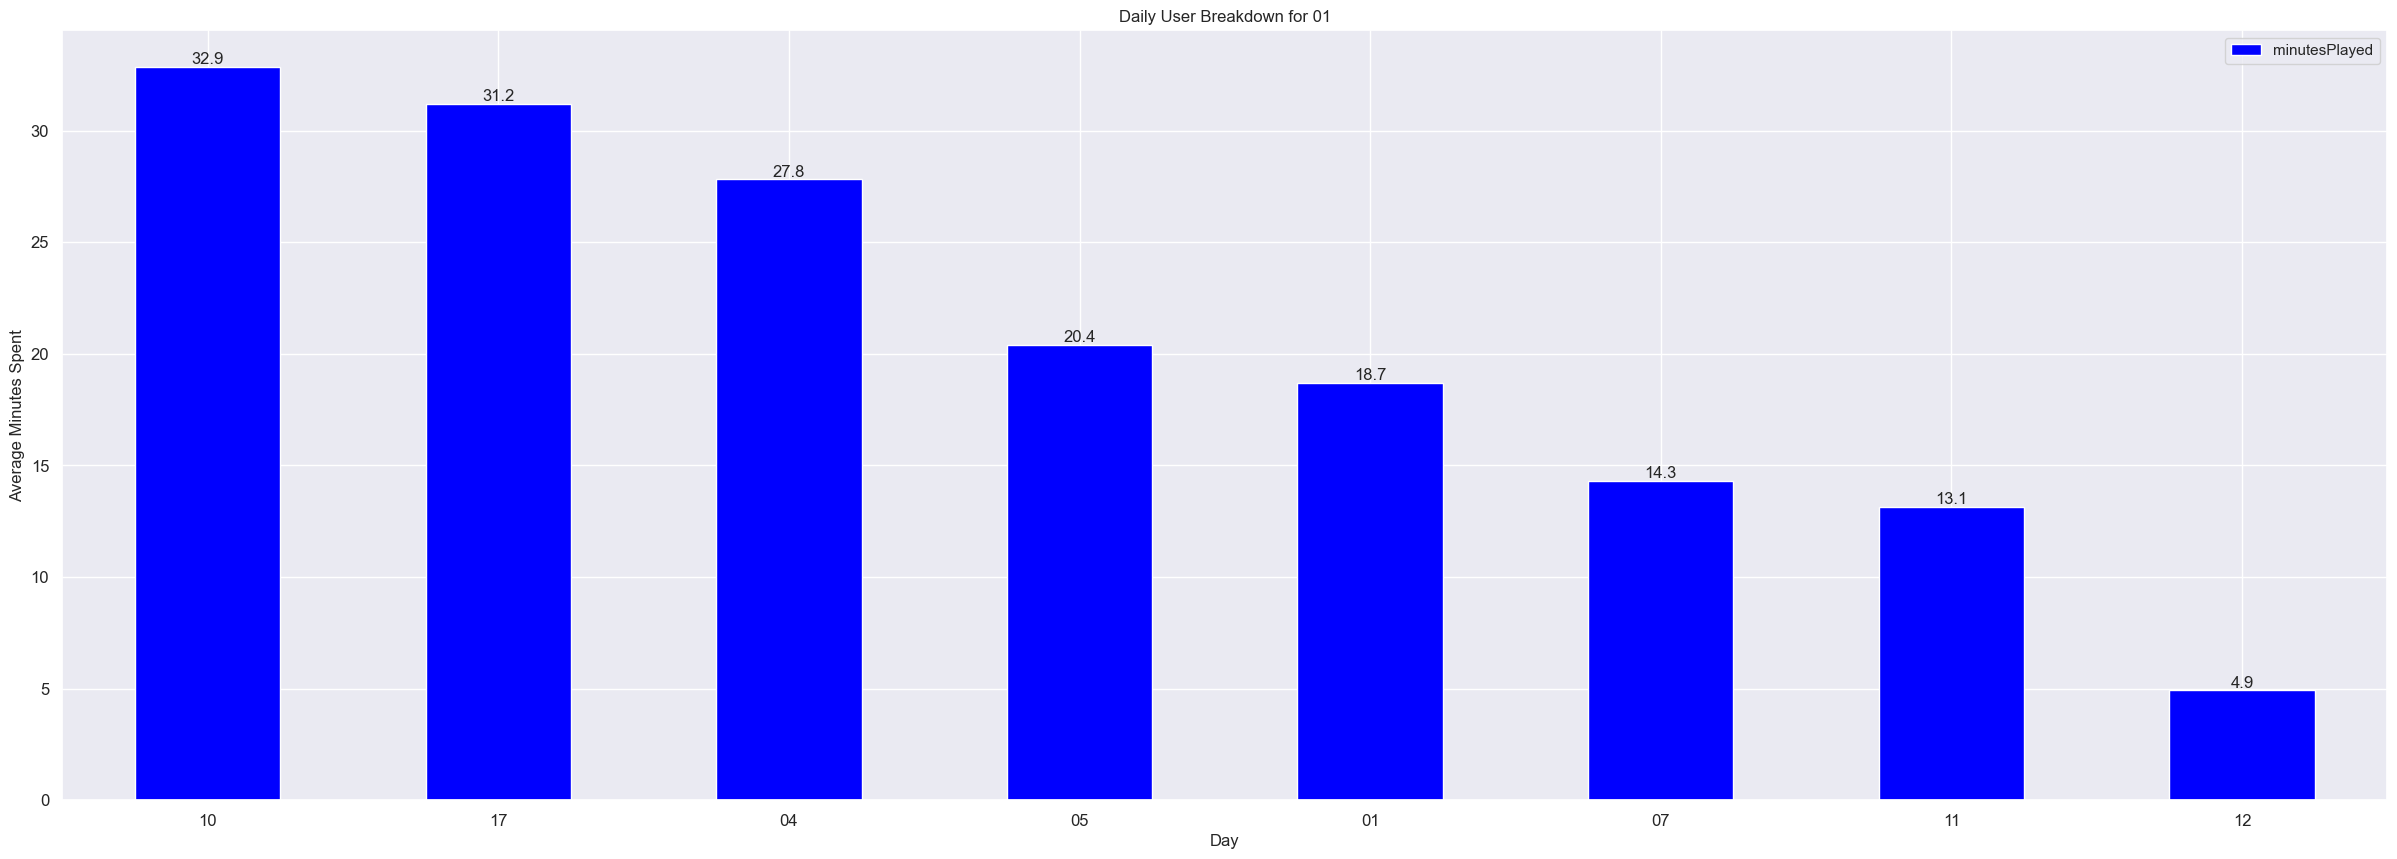

In [111]:
def get_top_mont(data):
    df = data.copy()
    grouped_df = df.groupby('month')['msPlayed'].sum().reset_index()
    sorted_df = grouped_df.sort_values('msPlayed', ascending=False)
    sorted_df['minutesPlayed'] = sorted_df['msPlayed'] / 60000
    sorted_df.drop(['msPlayed'], axis=1, inplace=True)
    print(sorted_df)
def month_breakdown(data,filter_month):
    df = data[data['month']==filter_month]
    grouped_df = df.groupby('day')['msPlayed'].sum().reset_index()
    sorted_df = grouped_df.sort_values('msPlayed', ascending=False)
    sorted_df['minutesPlayed'] = sorted_df['msPlayed'] / 60000
    sorted_df.drop(['msPlayed'], axis=1, inplace=True)
    ax = sorted_df.plot.bar(x='day', y='minutesPlayed', rot=0, figsize=(30,10), title=f"Daily User Breakdown for {filter_month}", xlabel='Day', ylabel='Average Minutes Spent', fontsize=12, color='blue')
    ax.bar_label(ax.containers[0], fmt='%.1f')
    print(sorted_df)

    
month_breakdown(data, '01')

In [92]:
def get_season_art(data, season):
    return get_artists(data[data['season']==season])
def get_season_son(data,season):
    return get_songs(data[data['season']==season])

get_season_art(data, 'spring')
    

                artistName  minutesPlayed
42                 The Jam      24.474850
40           The Crusaders      16.838883
9                Daft Punk      14.099983
38            Taylor Swift      13.987267
6               Bruno Mars       7.185233
14         Gil Scott-Heron       7.144517
27             Marvin Gaye       7.121550
4               Billy Paul       6.516433
21        Lisa Gordan Trio       6.415067
13           George Benson       6.256000
10         Dan Nimmer Trio       5.649550
1                B.B. King       5.412217
39      The Blue Room Band       5.268300
22           Low City Trio       5.111867
17              Hank Jones       4.706217
5      Brendan Maynard + 2       4.410433
7                    CMC 3       4.303083
35     Richie Beirach Trio       4.200000
2             Big Mountain       4.158667
34           One Direction       4.046500
25                 MEGTARO       4.043333
30         Newington Green       4.013633
32             O.V. Wright       3

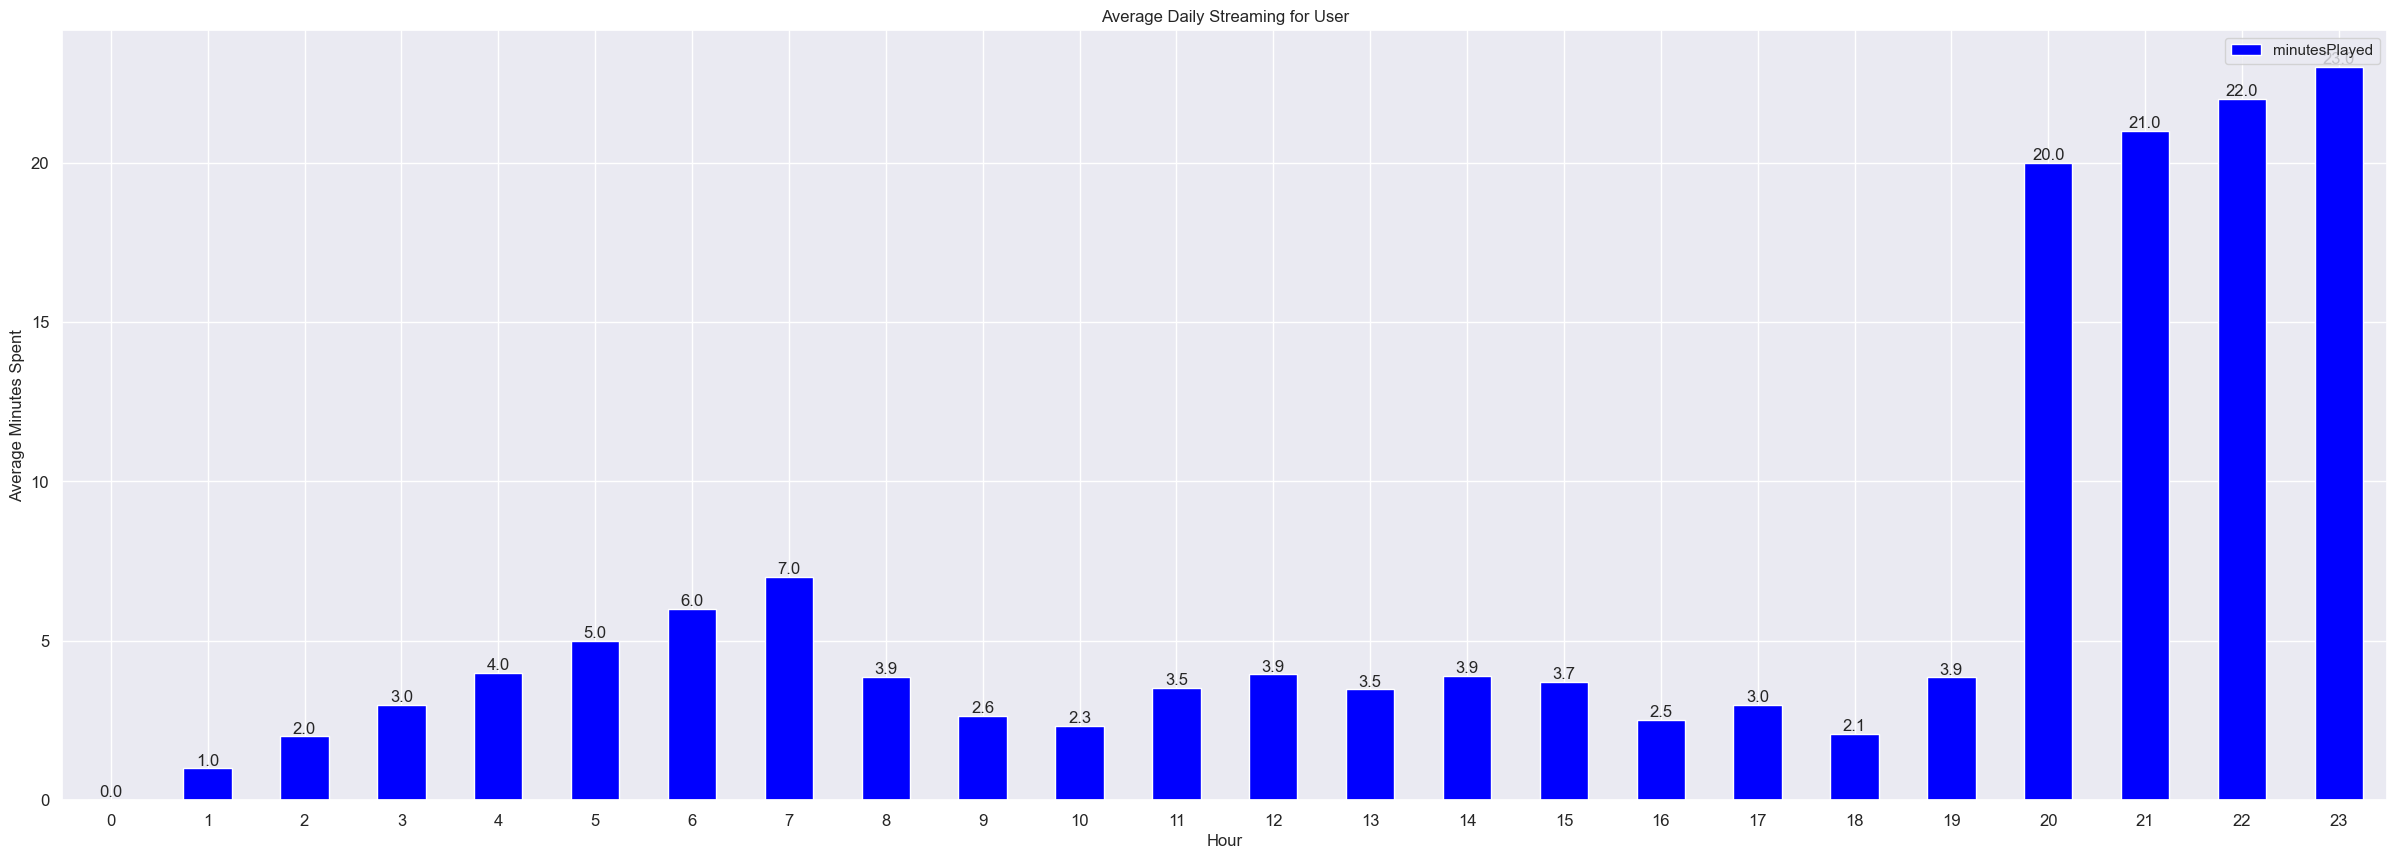

In [108]:
def get_hours(data):
    df = data.copy()
    sorted_df = df.groupby('hour')['msPlayed'].mean().reset_index()
    
    sorted_df['minutesPlayed'] = sorted_df['msPlayed'] / 60000
    sorted_df.drop(['msPlayed'], axis=1, inplace=True)
    df_small = sorted_df[['hour', 'minutesPlayed']]
    val = df_small.values.tolist()
    x = [i for i in range(24)]
    y = [i for i in range(24)]
    for lis in val:
        y[int(lis[0])] = lis[1]
    curDf = pd.DataFrame({'hour': x, 'minutesPlayed':y})
    
    ax = curDf.plot.bar(x='hour', y='minutesPlayed', rot=0, figsize=(30,10), title=f"Average Daily Streaming for User", xlabel='Hour', ylabel='Average Minutes Spent', fontsize=12, color='blue')
    ax.bar_label(ax.containers[0], fmt='%.1f')
   

get_hours(data)    